In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data = pd.read_csv("datasets/dataset_train.csv")
data['Birthday'] = pd.to_datetime(data['Birthday'])
data['Birthday Weekday'] = data['Birthday'].dt.dayofweek
data['Birthday Year'] = data['Birthday'].dt.year
data['Birthday Month'] = data['Birthday'].dt.month
data = data.drop(columns=['Index', 'First Name', 'Last Name', 'Birthday', 'Defense Against the Dark Arts', 'Arithmancy', 'Care of Magical Creatures'])
data

,Hogwarts House,Best Hand,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying,Birthday Weekday,Birthday Year,Birthday Month
0,Ravenclaw,Left,-487.886086,5.727180,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,-232.79405,-26.89,3,2000,3
1,Slytherin,Right,-552.060507,-5.987446,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,-252.18425,-113.45,3,1999,10
2,Ravenclaw,Left,-366.076117,7.725017,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-227.34265,30.42,2,1999,11
3,Gryffindor,Left,697.742809,-6.497214,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-256.84675,200.64,5,2000,8
4,Gryffindor,Left,436.775204,-7.820623,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-256.38730,157.98,6,1998,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Gryffindor,Right,354.280086,-4.541837,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-250.39401,185.83,4,2001,9
1596,Slytherin,Left,367.531174,6.061064,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-246.42719,44.80,3,1998,3
1597,Gryffindor,Right,544.018925,-3.203269,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,-251.63679,198.47,6,1999,10
1598,Hufflepuff,Left,453.676219,3.442831,6.738,-831.741123,383.444937,3.813111,1087.949205,3.904100,-246.19072,-76.81,4,2001,9


<Axes: xlabel='Hogwarts House', ylabel='Birthday Weekday'>

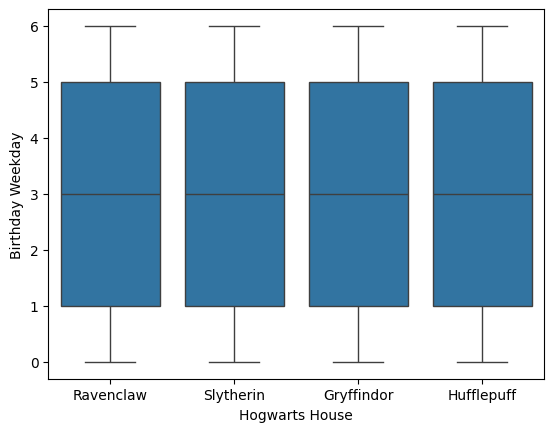

In [3]:
sns.boxplot(data=data, x='Hogwarts House', y='Birthday Weekday')

<Axes: xlabel='Hogwarts House', ylabel='Birthday Month'>

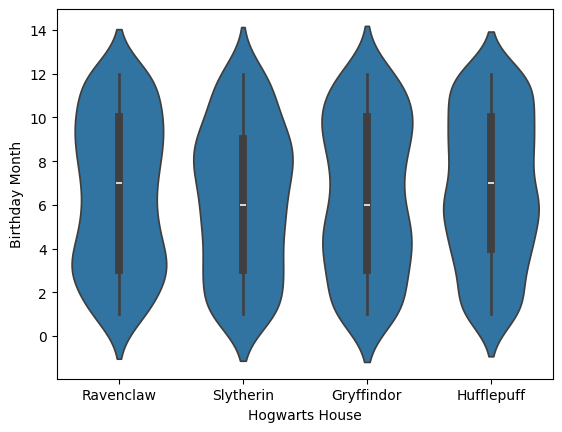

In [4]:
sns.violinplot(data=data, x='Hogwarts House', y='Birthday Month')

<Axes: xlabel='Hogwarts House', ylabel='Birthday Year'>

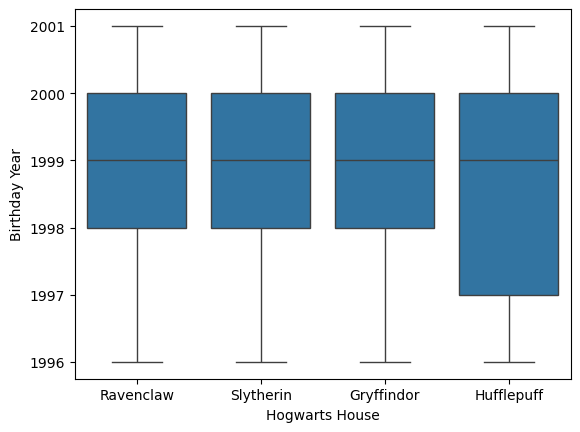

In [5]:
sns.boxplot(data=data, x='Hogwarts House', y='Birthday Year')

In [6]:
X = data.drop(columns=['Hogwarts House', 'Birthday Weekday'])
data['House Slytherin'] = (data['Hogwarts House'] == 'Slytherin').astype(int)
data['House Hufflepuff'] = (data['Hogwarts House'] == 'Hufflepuff').astype(int)
data['House Gryffindor'] = (data['Hogwarts House'] == 'Gryffindor').astype(int)
data['House Ravenclaw'] = (data['Hogwarts House'] == 'Ravenclaw').astype(int)
Y = data[[col for col in data.columns if col.startswith('House ')]]
display(X)
display(Y)

,Best Hand,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying,Birthday Year,Birthday Month
0,Left,-487.886086,5.727180,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,-232.79405,-26.89,2000,3
1,Right,-552.060507,-5.987446,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,-252.18425,-113.45,1999,10
2,Left,-366.076117,7.725017,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-227.34265,30.42,1999,11
3,Left,697.742809,-6.497214,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-256.84675,200.64,2000,8
4,Left,436.775204,-7.820623,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-256.38730,157.98,1998,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Right,354.280086,-4.541837,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-250.39401,185.83,2001,9
1596,Left,367.531174,6.061064,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-246.42719,44.80,1998,3
1597,Right,544.018925,-3.203269,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,-251.63679,198.47,1999,10
1598,Left,453.676219,3.442831,6.738,-831.741123,383.444937,3.813111,1087.949205,3.904100,-246.19072,-76.81,2001,9


,House Slytherin,House Hufflepuff,House Gryffindor,House Ravenclaw
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
1595,0,0,1,0
1596,1,0,0,0
1597,0,0,1,0
1598,0,1,0,0


# Missing values

In [7]:
X.isna().sum() / len(X) * 100

Best Hand           0.0000
Astronomy           2.0000
Herbology           2.0625
Divination          2.4375
Muggle Studies      2.1875
Ancient Runes       2.1875
History of Magic    2.6875
Transfiguration     2.1250
Potions             1.8750
Charms              0.0000
Flying              0.0000
Birthday Year       0.0000
Birthday Month      0.0000
dtype: float64

In [8]:
Y.isna().sum() / len(Y) * 100

House Slytherin     0.0
House Hufflepuff    0.0
House Gryffindor    0.0
House Ravenclaw     0.0
dtype: float64

In [9]:
(Y['House Slytherin'] + Y['House Gryffindor'] + Y['House Ravenclaw'] + Y['House Hufflepuff']).value_counts()

1    1600
Name: count, dtype: int64

# Preprocessings

In [10]:
data.groupby('Hogwarts House').mean(numeric_only=True)

,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying,Birthday Weekday,Birthday Year,Birthday Month,House Slytherin,House Hufflepuff,House Gryffindor,House Ravenclaw
Hogwarts House,,,,,,,,,,,,,,,,,
Gryffindor,493.336646,-4.783906,4.901349,-501.483149,596.934487,-4.814947,951.134696,2.938132,-252.731046,189.024526,3.042813,1998.749235,6.434251,0.0,0.0,1.0,0.0
Hufflepuff,497.708002,4.919408,5.021665,-498.350774,400.147454,5.010295,1049.562165,4.960686,-244.347364,-7.085690,2.965974,1998.750473,6.724008,0.0,1.0,0.0,0.0
Ravenclaw,-480.043083,5.021857,4.987894,489.111967,597.749968,4.915960,1050.334282,6.972413,-231.080576,-3.979797,3.022573,1998.977427,6.530474,0.0,0.0,0.0,1.0
Slytherin,-496.333927,-4.775624,-4.814491,-478.731883,401.813874,4.967681,1051.898698,9.470743,-249.593194,-70.321661,3.079734,1998.734219,6.289037,1.0,0.0,0.0,0.0


In [11]:
data

,Hogwarts House,Best Hand,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying,Birthday Weekday,Birthday Year,Birthday Month,House Slytherin,House Hufflepuff,House Gryffindor,House Ravenclaw
0,Ravenclaw,Left,-487.886086,5.727180,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,-232.79405,-26.89,3,2000,3,0,0,0,1
1,Slytherin,Right,-552.060507,-5.987446,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,-252.18425,-113.45,3,1999,10,1,0,0,0
2,Ravenclaw,Left,-366.076117,7.725017,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-227.34265,30.42,2,1999,11,0,0,0,1
3,Gryffindor,Left,697.742809,-6.497214,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-256.84675,200.64,5,2000,8,0,0,1,0
4,Gryffindor,Left,436.775204,-7.820623,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-256.38730,157.98,6,1998,9,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Gryffindor,Right,354.280086,-4.541837,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-250.39401,185.83,4,2001,9,0,0,1,0
1596,Slytherin,Left,367.531174,6.061064,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-246.42719,44.80,3,1998,3,1,0,0,0
1597,Gryffindor,Right,544.018925,-3.203269,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,-251.63679,198.47,6,1999,10,0,0,1,0
1598,Hufflepuff,Left,453.676219,3.442831,6.738,-831.741123,383.444937,3.813111,1087.949205,3.904100,-246.19072,-76.81,4,2001,9,0,1,0,0


In [12]:
def ft_train_test_split(X, Y, test_size=0.25, stratify_col=None, random_state=None):
    if not stratify_col:
        X_train = X.sample(frac=1-test_size, random_state=random_state)
    else:
        groups = X.groupby(stratify_col).groups
        X_train = pd.DataFrame()
        for group in groups.values():
            group_sample = X.iloc[group].sample(frac=1-test_size, random_state=random_state)
            X_train = pd.concat([X_train, group_sample])
    X_test = X.iloc[X.index.difference(X_train.index)]
    Y_train = Y.iloc[X_train.index]
    Y_test = Y.iloc[Y.index.difference(Y_train.index)]
    return (X_train, X_test, Y_train, Y_test)


In [13]:
X_train, X_test, Y_train, Y_test = ft_train_test_split(X, Y)
display(X_train)
display(X_test)
display(Y_train)
display(Y_test)

,Best Hand,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying,Birthday Year,Birthday Month
776,Right,-557.159470,-5.461713,-5.502,-661.441183,354.389137,6.749270,1060.169157,10.255861,-250.28443,-108.71,1998,3
1046,Left,NaN,5.314814,5.772,-490.062594,395.519223,4.239151,1048.008822,4.579971,-243.89710,16.81,2001,4
287,Left,480.923633,3.870897,5.445,-428.611995,378.778253,7.971454,1048.057298,5.989587,-243.52366,-55.79,1999,5
730,Right,-294.381171,5.803758,7.714,486.268527,642.599158,3.985552,1054.045535,7.014180,-229.99104,17.15,1999,5
213,Right,NaN,-8.847166,-4.576,-398.939431,403.440118,6.710515,1057.463951,11.667527,-251.47774,-126.76,1999,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,Right,-468.546314,-5.700883,NaN,-524.176246,426.964724,5.930672,1055.648164,11.770986,-247.46986,-64.09,1997,6
738,Left,310.058283,4.973183,5.997,-654.564085,385.810910,1.982866,NaN,1.237469,-244.64615,-38.02,2000,6
1426,Right,583.874494,6.049432,4.855,-659.181125,439.836170,6.967560,1049.801094,8.847945,-243.42114,18.44,1998,8
964,Left,573.848783,5.432414,3.491,-499.098168,369.649864,5.193273,1051.642878,5.177024,-245.90092,-3.63,1997,3


,Best Hand,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying,Birthday Year,Birthday Month
6,Left,628.046051,-4.861976,NaN,-926.892512,583.742442,-7.322486,923.539573,1.646666,-257.83447,261.55,2000,9
8,Left,496.394945,-5.215891,5.855,-626.552041,567.842402,-6.198661,925.255500,1.086518,-252.27561,244.11,1998,12
13,Left,-544.192049,-7.308856,-6.180,-319.946875,391.652916,2.914732,1082.581409,10.948791,-251.12516,-80.42,1997,2
16,Left,470.653757,-5.518264,4.425,-434.293266,596.610089,-4.161823,967.223912,5.027415,-252.27344,174.27,1997,9
23,Left,673.167110,0.131516,9.421,-709.696428,461.896734,0.531823,1073.585204,6.346027,-245.83067,23.46,1999,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,Left,-364.120441,5.799115,6.553,NaN,602.254040,6.465690,1034.042921,5.427974,-231.32398,-28.30,2000,10
1588,Right,-492.510311,-2.208650,-7.270,-622.936567,NaN,2.201186,1069.012391,9.117247,-250.91192,-19.50,1999,4
1590,Right,-569.513380,6.915328,3.958,559.775978,543.431180,2.882075,1065.526524,5.038939,-229.84860,17.86,1996,11
1594,Left,599.901612,5.479485,5.543,-525.883264,467.950418,5.933211,1034.394428,9.344054,-241.96940,71.23,1999,8


,House Slytherin,House Hufflepuff,House Gryffindor,House Ravenclaw
776,1,0,0,0
1046,0,1,0,0
287,0,1,0,0
730,0,0,0,1
213,1,0,0,0
...,...,...,...,...
406,1,0,0,0
738,0,1,0,0
1426,0,1,0,0
964,0,1,0,0


,House Slytherin,House Hufflepuff,House Gryffindor,House Ravenclaw
6,0,0,1,0
8,0,0,1,0
13,1,0,0,0
16,0,0,1,0
23,0,1,0,0
...,...,...,...,...
1575,0,0,0,1
1588,1,0,0,0
1590,0,0,0,1
1594,0,1,0,0


In [14]:
from logreg_train import SimpleImputer, StandardScaler, OneHotEncoder, PreprocessorPipeline
numerical_cols = ['Astronomy', 'Herbology', 'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions', 'Charms', 'Flying', 'Birthday Year']
categorical_cols = ['Birthday Month', 'Best Hand']
imputer = SimpleImputer(numerical_cols, categorical_cols)
scaler = StandardScaler(numerical_cols)
ohe = OneHotEncoder(categorical_cols)
preprocessor = PreprocessorPipeline([imputer, scaler, ohe])

In [15]:
preprocessor

--- SimpleImputer ---
Means: None
Modes: None

--- StandardScaler ---
Means: None
Standard Deviations: None

--- OneHotEncoder ---
Columns mapping: {}
Drop Last: True


In [16]:
preprocessor.fit(X_train)
preprocessor

--- SimpleImputer ---
Means: {'Astronomy': 48.569161922791366, 'Herbology': 1.142410056375128, 'Divination': 3.208697773972603, 'Muggle Studies': -220.70228222129575, 'Ancient Runes': 496.3424237355768, 'History of Magic': 2.947124713808424, 'Transfiguration': 1029.6727581063765, 'Potions': 5.918416394256176, 'Charms': -243.39148454166667, 'Flying': 22.683066666666665, 'Birthday Year': 1998.7966666666666}
Modes: {'Birthday Month': 9, 'Best Hand': 'Right'}

--- StandardScaler ---
Means: {'Astronomy': 48.569161922791366, 'Herbology': 1.142410056375128, 'Divination': 3.208697773972603, 'Muggle Studies': -220.70228222129575, 'Ancient Runes': 496.3424237355768, 'History of Magic': 2.947124713808424, 'Transfiguration': 1029.6727581063765, 'Potions': 5.918416394256176, 'Charms': -243.39148454166667, 'Flying': 22.683066666666665, 'Birthday Year': 1998.7966666666666}
Standard Deviations: {'Astronomy': 523.0043318823014, 'Herbology': 5.230993834424412, 'Divination': 4.134530995422767, 'Muggle St

In [17]:
data_train = data.iloc[X_train.index,:]
data_train

,Hogwarts House,Best Hand,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying,Birthday Weekday,Birthday Year,Birthday Month,House Slytherin,House Hufflepuff,House Gryffindor,House Ravenclaw
776,Slytherin,Right,-557.159470,-5.461713,-5.502,-661.441183,354.389137,6.749270,1060.169157,10.255861,-250.28443,-108.71,0,1998,3,1,0,0,0
1046,Hufflepuff,Left,NaN,5.314814,5.772,-490.062594,395.519223,4.239151,1048.008822,4.579971,-243.89710,16.81,1,2001,4,0,1,0,0
287,Hufflepuff,Left,480.923633,3.870897,5.445,-428.611995,378.778253,7.971454,1048.057298,5.989587,-243.52366,-55.79,1,1999,5,0,1,0,0
730,Ravenclaw,Right,-294.381171,5.803758,7.714,486.268527,642.599158,3.985552,1054.045535,7.014180,-229.99104,17.15,6,1999,5,0,0,0,1
213,Slytherin,Right,NaN,-8.847166,-4.576,-398.939431,403.440118,6.710515,1057.463951,11.667527,-251.47774,-126.76,6,1999,9,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,Slytherin,Right,-468.546314,-5.700883,NaN,-524.176246,426.964724,5.930672,1055.648164,11.770986,-247.46986,-64.09,2,1997,6,1,0,0,0
738,Hufflepuff,Left,310.058283,4.973183,5.997,-654.564085,385.810910,1.982866,NaN,1.237469,-244.64615,-38.02,2,2000,6,0,1,0,0
1426,Hufflepuff,Right,583.874494,6.049432,4.855,-659.181125,439.836170,6.967560,1049.801094,8.847945,-243.42114,18.44,6,1998,8,0,1,0,0
964,Hufflepuff,Left,573.848783,5.432414,3.491,-499.098168,369.649864,5.193273,1051.642878,5.177024,-245.90092,-3.63,0,1997,3,0,1,0,0


In [18]:
X_train_preprocessed = preprocessor.transform(X_train)
X_train_preprocessed

,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying,...,Birthday Month_3,Birthday Month_4,Birthday Month_5,Birthday Month_6,Birthday Month_7,Birthday Month_8,Birthday Month_9,Birthday Month_10,Birthday Month_11,Best Hand_Left
776,-1.158171,-1.262499,-2.106816,-0.904167,-1.330835,0.855506,0.683302,1.369429,-0.780405,-1.337180,...,1,0,0,0,0,0,0,0,0,0
1046,0.000000,0.797631,0.619974,-0.552588,-0.945234,0.290714,0.410838,-0.422578,-0.057245,-0.059770,...,0,1,0,0,0,0,0,0,0,1
287,0.826675,0.521600,0.540884,-0.426523,-1.102183,1.130504,0.411924,0.022470,-0.014965,-0.798616,...,0,0,1,0,0,0,0,0,0,1
730,-0.655731,0.891102,1.089677,1.450337,1.371180,0.233652,0.546096,0.345957,1.517171,-0.056310,...,0,0,1,0,0,0,0,0,0,0
213,0.000000,-1.909690,-1.882849,-0.365650,-0.870974,0.846786,0.622689,1.815124,-0.915509,-1.520874,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,-0.988740,-1.308220,0.000000,-0.622571,-0.650427,0.671316,0.582005,1.847789,-0.461745,-0.883085,...,0,0,0,1,0,0,0,0,0,0
738,0.499975,0.732322,0.674394,-0.890059,-1.036251,-0.216964,0.000000,-1.477881,-0.142051,-0.617772,...,0,0,0,1,0,0,0,0,0,1
1426,1.023520,0.938067,0.398184,-0.899531,-0.529755,0.904622,0.450996,0.924919,-0.003358,-0.043181,...,0,0,0,0,0,1,0,0,0,0
964,1.004350,0.820113,0.068279,-0.571124,-1.187763,0.505397,0.492263,-0.234075,-0.284113,-0.267787,...,1,0,0,0,0,0,0,0,0,1


In [19]:
from logreg_train import SortingHat

sorting_hat = SortingHat(X_train_preprocessed.shape[1], lr=0.05)
sorting_hat

In [21]:
X_test_preprocessed = preprocessor.transform(X_test)
X_test_preprocessed

,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying,...,Birthday Month_3,Birthday Month_4,Birthday Month_5,Birthday Month_6,Birthday Month_7,Birthday Month_8,Birthday Month_9,Birthday Month_10,Birthday Month_11,Best Hand_Left
6,1.107977,-1.147848,0.000000,-1.448736,0.819389,-2.310724,-2.378020,-1.348688,-1.635205,2.430936,...,0,0,0,0,0,0,1,0,0,1
8,0.856256,-1.215505,0.640049,-0.832593,0.670324,-2.057857,-2.339573,-1.525540,-1.005843,2.253450,...,0,0,0,0,0,0,0,0,0,1
13,-1.133377,-1.615614,-2.270801,-0.203598,-0.981481,-0.007289,1.185471,1.588203,-0.875591,-1.049274,...,0,0,0,0,0,0,0,0,0,1
16,0.807038,-1.273309,0.294181,-0.438178,0.940025,-1.599556,-1.399229,-0.281309,-1.005597,1.542692,...,0,0,0,0,0,0,1,0,0,1
23,1.194250,-0.193251,1.502541,-1.003162,-0.322934,-0.543457,0.983902,0.135006,-0.276160,0.007907,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,-0.789075,0.890214,0.808871,0.000000,0.992938,0.791698,0.097918,-0.154844,1.366258,-0.518852,...,0,0,0,0,0,0,0,1,0,1
1588,-1.034560,-0.640616,-2.534434,-0.825176,0.000000,-0.167841,0.881444,1.009943,-0.851448,-0.429295,...,0,1,0,0,0,0,0,0,0,0
1590,-1.181792,1.103599,0.181230,1.601136,0.441465,-0.014637,0.803340,-0.277671,1.533298,-0.049084,...,0,0,0,0,0,0,0,0,1,0
1594,1.054164,0.829111,0.564587,-0.626073,-0.266180,0.671887,0.105794,1.081551,0.161006,0.494060,...,0,0,0,0,0,1,0,0,0,1


In [22]:
for i in range(1000):
    sorting_hat.train_step(X_train_preprocessed, Y_train, X_test_preprocessed, Y_test)

In [23]:
data_train['pred'] = sorting_hat.predict(X_train_preprocessed)

/tmp/ipykernel_450415/769043894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['pred'] = sorting_hat.predict(X_train_preprocessed)


In [24]:
sorting_hat(X_train_preprocessed)

array([[9.96234564e-01, 8.27943512e-03, 1.71250240e-02, ...,
        1.32622379e-02, 1.68838272e-02, 5.05716911e-04],
       [1.39059651e-02, 9.63140410e-01, 9.96235849e-01, ...,
        9.91802479e-01, 9.97536652e-01, 1.87369527e-03],
       [6.47162090e-04, 5.94144070e-03, 1.89756918e-03, ...,
        4.76788404e-03, 5.22349521e-03, 9.96595253e-01],
       [3.72958766e-03, 3.30312604e-02, 1.13967254e-02, ...,
        8.30810685e-03, 2.57572404e-03, 8.90021284e-04]])

In [25]:
houses = {0 : 'Slytherin', 1 : 'Hufflepuff', 2 : 'Gryffindor', 3 : 'Ravenclaw'}
data_train = data_train.replace({'pred':houses})
data_train

,Hogwarts House,Best Hand,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying,Birthday Weekday,Birthday Year,Birthday Month,House Slytherin,House Hufflepuff,House Gryffindor,House Ravenclaw,pred
776,Slytherin,Right,-557.159470,-5.461713,-5.502,-661.441183,354.389137,6.749270,1060.169157,10.255861,-250.28443,-108.71,0,1998,3,1,0,0,0,Slytherin
1046,Hufflepuff,Left,NaN,5.314814,5.772,-490.062594,395.519223,4.239151,1048.008822,4.579971,-243.89710,16.81,1,2001,4,0,1,0,0,Hufflepuff
287,Hufflepuff,Left,480.923633,3.870897,5.445,-428.611995,378.778253,7.971454,1048.057298,5.989587,-243.52366,-55.79,1,1999,5,0,1,0,0,Hufflepuff
730,Ravenclaw,Right,-294.381171,5.803758,7.714,486.268527,642.599158,3.985552,1054.045535,7.014180,-229.99104,17.15,6,1999,5,0,0,0,1,Ravenclaw
213,Slytherin,Right,NaN,-8.847166,-4.576,-398.939431,403.440118,6.710515,1057.463951,11.667527,-251.47774,-126.76,6,1999,9,1,0,0,0,Slytherin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,Slytherin,Right,-468.546314,-5.700883,NaN,-524.176246,426.964724,5.930672,1055.648164,11.770986,-247.46986,-64.09,2,1997,6,1,0,0,0,Slytherin
738,Hufflepuff,Left,310.058283,4.973183,5.997,-654.564085,385.810910,1.982866,NaN,1.237469,-244.64615,-38.02,2,2000,6,0,1,0,0,Hufflepuff
1426,Hufflepuff,Right,583.874494,6.049432,4.855,-659.181125,439.836170,6.967560,1049.801094,8.847945,-243.42114,18.44,6,1998,8,0,1,0,0,Hufflepuff
964,Hufflepuff,Left,573.848783,5.432414,3.491,-499.098168,369.649864,5.193273,1051.642878,5.177024,-245.90092,-3.63,0,1997,3,0,1,0,0,Hufflepuff


In [26]:
data_train['true']=(data_train['Hogwarts House'] == data_train['pred'])
data_train['true'].sum() / len(data_train)

0.985

In [27]:
data_test = data.iloc[X_test.index]

In [28]:
data_test['pred'] = sorting_hat.predict(X_test_preprocessed)
houses = {0 : 'Slytherin', 1 : 'Hufflepuff', 2 : 'Gryffindor', 3 : 'Ravenclaw'}
data_test = data_test.replace({'pred':houses})
data_test

/tmp/ipykernel_450415/3457594831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['pred'] = sorting_hat.predict(X_test_preprocessed)


,Hogwarts House,Best Hand,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying,Birthday Weekday,Birthday Year,Birthday Month,House Slytherin,House Hufflepuff,House Gryffindor,House Ravenclaw,pred
6,Gryffindor,Left,628.046051,-4.861976,NaN,-926.892512,583.742442,-7.322486,923.539573,1.646666,-257.83447,261.55,5,2000,9,0,0,1,0,Gryffindor
8,Gryffindor,Left,496.394945,-5.215891,5.855,-626.552041,567.842402,-6.198661,925.255500,1.086518,-252.27561,244.11,0,1998,12,0,0,1,0,Gryffindor
13,Slytherin,Left,-544.192049,-7.308856,-6.180,-319.946875,391.652916,2.914732,1082.581409,10.948791,-251.12516,-80.42,3,1997,2,1,0,0,0,Slytherin
16,Gryffindor,Left,470.653757,-5.518264,4.425,-434.293266,596.610089,-4.161823,967.223912,5.027415,-252.27344,174.27,1,1997,9,0,0,1,0,Gryffindor
23,Hufflepuff,Left,673.167110,0.131516,9.421,-709.696428,461.896734,0.531823,1073.585204,6.346027,-245.83067,23.46,0,1999,7,0,1,0,0,Hufflepuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,Ravenclaw,Left,-364.120441,5.799115,6.553,NaN,602.254040,6.465690,1034.042921,5.427974,-231.32398,-28.30,6,2000,10,0,0,0,1,Ravenclaw
1588,Slytherin,Right,-492.510311,-2.208650,-7.270,-622.936567,NaN,2.201186,1069.012391,9.117247,-250.91192,-19.50,4,1999,4,1,0,0,0,Slytherin
1590,Ravenclaw,Right,-569.513380,6.915328,3.958,559.775978,543.431180,2.882075,1065.526524,5.038939,-229.84860,17.86,3,1996,11,0,0,0,1,Ravenclaw
1594,Hufflepuff,Left,599.901612,5.479485,5.543,-525.883264,467.950418,5.933211,1034.394428,9.344054,-241.96940,71.23,4,1999,8,0,1,0,0,Hufflepuff


In [29]:
data_test['true']=(data_test['Hogwarts House'] == data_test['pred'])
print(data_train['true'].sum() / len(data_train))
print(data_test['true'].sum() / len(data_test))

0.985
0.9725


In [30]:
losses = pd.DataFrame(sorting_hat.losses)
fig = go.Figure()
fig.add_trace(go.Line(x = losses['step'], y = losses['train_loss']))
fig.add_trace(go.Line(x = losses['step'], y = losses['test_loss']))
fig.show()

/mnt/nfs/homes/acostes/.local/lib/python3.10/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


